<a href="https://colab.research.google.com/github/masadlara/CryptoData_AutomatedPull/blob/main/Crypto_Data_Automated_Pull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook Description

This notebook presents an automated crypto data project focused on pulling different data items for different cryptocurrencies such as prices, trade volumes, and market capitalization from the webiste CoinMarketCap.com, using their API. The objective is to collect, manipulate, transform and visualize data for cryptocurrencies, analyze and visualize their pricing and price changes over time.

The notebook begins by introducing CoinMarketCap website and the used API. It then demonstrates step-by-step how to pull real-time data from the website using Python scripts, along with **Requests** which is a library for making HTTP requests. It provides an easy-to-use interface that makes working with HTTP very simple, **Pandas** which is a library used for data manipulation, and **JavaScript Object Notation (JSON)** which is a standardized format commonly used to transfer data as text that can be sent over a network. It's used by lots of APIs and Databases, and it's easy for both humans and machines to read. JSON represents objects as name/value pairs, just like a Python dictionary.

Overall, this notebook serves as a comprehensive guide for crypto data pull from CoinMarketCap website, extracting coin names, prices, trade volumes, price changes and market capitalization, exporting the pulled data into a CSV file, and automating the process of monitoring for crypto price and price changes everyday!

#Introduction

In today's rapidly evolving cryptocurrency market, access to real-time data is crucial for informed decision-making. This case study focuses on automating the process of pulling cryptocurrency data using an API, enabling data-driven insights and analysis. By streamlining the data retrieval process, we aim to enhance efficiency, accuracy, and the ability to respond swiftly to market changes.
This case study proceeds to manipulate and transform pulled crypto data before performing some data visualization.

The data used for this project is extracted from CoinMarketCap, which is a leading platform for cryptocurrency information and data. It provides real-time data on prices, market capitalizations, and other metrics for various cryptocurrencies. With its user-friendly interface and comprehensive coverage, CoinMarketCap is a valuable resource for staying informed about the cryptocurrency market.

#Pulling & Printing Crypto Data from CoinMarketCap.com using API

In [2]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f0090c1d-a040-49bb-8bfe-9bbd694c00eb',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  sample_data = data['data'][:15]  # Get the first 15 elements as a sample as an error was encountered when fetching the entire dataset due to data rate limit
  print(sample_data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

[{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10327, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-portfolio', 'bitcoin-ecosystem'], 'max_supply': 21000000, 'circulating_supply': 19423243, 'total_supply': 19423243, 'infinite_supply': False, 'platform': None, 'cmc_ran

In [3]:
type(sample_data)

list

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None) #to show every single column of the dataset
#pd.set_option('display.max_rows', None) #to show every single row of the dataset

In [5]:
df = pd.json_normalize(sample_data) #this shows the data in a neat dataframe
df['timestamp'] = pd.to_datetime('now', utc=True) #to add a timestamp to our dataset
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10327,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.942324e+07,1.942324e+07,False,NaN,1,NaN,NaN,None,2023-07-08T06:02:00.000Z,30249.706651,1.138238e+10,-49.4923,0.038966,0.089705,-0.583319,14.788825,9.862965,8.138844,5.875474e+11,49.9060,6.352438e+11,None,2023-07-08T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:03:32.719786+00:00
1,1027,Ethereum,ETH,ethereum,7098,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202092e+08,1.202092e+08,True,NaN,2,NaN,NaN,None,2023-07-08T06:02:00.000Z,1862.791933,5.549090e+09,-42.4267,0.132607,0.233280,-2.913003,1.438156,1.227956,1.521583,2.239246e+11,19.0202,2.239246e+11,None,2023-07-08T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:03:32.719786+00:00
2,825,Tether,USDT,tether,56535,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.336072e+10,8.573098e+10,True,NaN,3,NaN,NaN,None,2023-07-08T06:01:00.000Z,1.000029,1.842618e+10,-42.8072,-0.023332,-0.004768,0.015627,0.003271,-0.073806,-0.051313,8.336316e+10,7.0809,8.573349e+10,None,2023-07-08T06:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-08 06:03:32.719786+00:00
3,1839,BNB,BNB,bnb,1488,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558501e+08,1.558501e+08,False,NaN,4,NaN,NaN,None,2023-07-08T06:02:00.000Z,235.779542,3.771679e+08,-34.0320,0.105299,0.547893,-2.165377,-9.150424,-25.022599,-24.226402,3.674627e+10,3.1210,3.674627e+10,None,2023-07-08T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:03:32.719786+00:00
4,3408,USD Coin,USDC,usd-coin,13233,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.750387e+10,2.750387e+10,False,NaN,5,NaN,NaN,None,2023-07-08T06:01:00.000Z,0.999947,2.719216e+09,-39.7123,-0.022253,-0.002143,-0.005445,0.005988,-0.007907,0.002444,2.750241e+10,2.3364,2.750241e+10,None,2023-07-08T06:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-08 06:03:32.719786+00:00
5,52,XRP,XRP,xrp,978,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,None,2023-07-08T06:02:00.000Z,0.467347,5.833841e+08,-40.6514,0.105983,-0.583056,-0.263466,-10.475106,9.464086,-7.763015,2.442087e+10,2.0745,4.673466e+10,None,2023-07-08T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:03:32.719786+00:00
6,2010,Cardano,ADA,cardano,857,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.496091e+10,3.595238e+10,False,NaN,7,NaN,NaN,None,2023-07-08T06:02:00.000Z,0.283372,1.879856e+08,-36.9265,-0.102304,0.590286,-0.496966,-12.556424,-22.302255,-26.933519,9.906941e+09,0.8415,1.275174e+10,None,2023-07-08T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:03:32.719786+00:00
7,74,Dogecoin,DOGE,dogecoin,739,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.400833e+11,1.400833e+11,True,NaN,8,NaN,NaN,None,2023-07-08T06:02:00.000Z,0.065152,1.847254e+08,-35.8717,-0.070956,-0.569989,-4.675877,-3.685663,-10.550946,-20.647449,9.126694e+09,0.7752,9.126694e+09,None,2023-07-08T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:03:32.719786+00:00
8,5426,Solana,SOL,solana,483,2020-04-10T00:00:00.000Z,"[po

#Automating CoinMarketCap Data Pull

In [6]:
def api_runner ():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'f0090c1d-a040-49bb-8bfe-9bbd694c00eb',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    sample_data = data['data'][:15]  # Get the first 15 elements as a sample as an error was encountered when fetching the entire dataset due to data rate limit
    print(sample_data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

  df2 = pd.json_normalize(sample_data) #this shows the data in a neat dataframe
  df2['timestamp'] = pd.to_datetime('now', utc=True) #to add a timestamp to our dataset
  df=df.append(df2)

In [7]:
import os
from time import time
from time import sleep

for i in range(333):  # Our daily limit in CoinMarketCap is 333
      api_runner()  # Call the api_runner() function
      print('API Runner Completed Successfully')
      sleep(60)  # Sleep for 1 minute - 60 seconds
exit()

[{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10327, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-portfolio', 'bitcoin-ecosystem'], 'max_supply': 21000000, 'circulating_supply': 19423243, 'total_supply': 19423243, 'infinite_supply': False, 'platform': None, 'cmc_ran

<ipython-input-6-5d8029fb4f1c>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


[{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10327, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-portfolio', 'bitcoin-ecosystem'], 'max_supply': 21000000, 'circulating_supply': 19423243, 'total_supply': 19423243, 'infinite_supply': False, 'platform': None, 'cmc_ran

<ipython-input-6-5d8029fb4f1c>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


[{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10327, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-portfolio', 'bitcoin-ecosystem'], 'max_supply': 21000000, 'circulating_supply': 19423243, 'total_supply': 19423243, 'infinite_supply': False, 'platform': None, 'cmc_ran

<ipython-input-6-5d8029fb4f1c>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


[{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10327, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-portfolio', 'bitcoin-ecosystem'], 'max_supply': 21000000, 'circulating_supply': 19423243, 'total_supply': 19423243, 'infinite_supply': False, 'platform': None, 'cmc_ran

<ipython-input-6-5d8029fb4f1c>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


KeyboardInterrupt: ignored

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10327,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.942324e+07,1.942324e+07,False,NaN,1,NaN,NaN,None,2023-07-08T06:02:00.000Z,30249.706651,1.138238e+10,-49.4923,0.038966,0.089705,-0.583319,14.788825,9.862965,8.138844,5.875474e+11,49.9060,6.352438e+11,None,2023-07-08T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:03:32.719786+00:00
1,1027,Ethereum,ETH,ethereum,7098,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202092e+08,1.202092e+08,True,NaN,2,NaN,NaN,None,2023-07-08T06:02:00.000Z,1862.791933,5.549090e+09,-42.4267,0.132607,0.233280,-2.913003,1.438156,1.227956,1.521583,2.239246e+11,19.0202,2.239246e+11,None,2023-07-08T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:03:32.719786+00:00
2,825,Tether,USDT,tether,56535,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.336072e+10,8.573098e+10,True,NaN,3,NaN,NaN,None,2023-07-08T06:01:00.000Z,1.000029,1.842618e+10,-42.8072,-0.023332,-0.004768,0.015627,0.003271,-0.073806,-0.051313,8.336316e+10,7.0809,8.573349e+10,None,2023-07-08T06:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-08 06:03:32.719786+00:00
3,1839,BNB,BNB,bnb,1488,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558501e+08,1.558501e+08,False,NaN,4,NaN,NaN,None,2023-07-08T06:02:00.000Z,235.779542,3.771679e+08,-34.0320,0.105299,0.547893,-2.165377,-9.150424,-25.022599,-24.226402,3.674627e+10,3.1210,3.674627e+10,None,2023-07-08T06:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:03:32.719786+00:00
4,3408,USD Coin,USDC,usd-coin,13233,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.750387e+10,2.750387e+10,False,NaN,5,NaN,NaN,None,2023-07-08T06:01:00.000Z,0.999947,2.719216e+09,-39.7123,-0.022253,-0.002143,-0.005445,0.005988,-0.007907,0.002444,2.750241e+10,2.3364,2.750241e+10,None,2023-07-08T06:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-08 06:03:32.719786+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1958,TRON,TRX,tron,783,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, sec-security...",NaN,8.985566e+10,8.985568e+10,True,NaN,11,7.165966e+10,5.664627e+09,None,2023-07-08T06:05:00.000Z,0.079049,1.614491e+08,-5.7293,-0.247455,1.214072,3.664414,3.199108,15.301113,19.612972,7.103003e+09,0.6033,7.103004e+09,None,2023-07-08T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:06:44.981804+00:00
11,6636,Polkadot,DOT,polkadot-new,527,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1.239390e+09,1.331975e+09,True,NaN,12,NaN,NaN,None,2023-07-08T06:05:00.000Z,5.151397,9.097560e+07,-31.4795,0.130658,0.929951,-0.578443,2.878478,-4.296949,-16.294559,6.384589e+09,0.5421,6.861531e+09,None,2023-07-08T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-08 06:06:44.981804+00:00
12,3890,Polygon,MATIC,polygon,764,2019-04-28T00:00:00.000Z,"[pos, platform, enterprise-solutions, zero-kno...",1.000000e+10,9.319469e+09,1.000000e+10,False,NaN,13,NaN,NaN,None,2023-07-08T06:05:00.000Z,0.678675,2.378794e+08,-41.1198,0.047136,2.066836,3.475035,-11.001723,-24.223599,-38.269053,6.3248

#Data Manipulation & Transformation

The below code computes the mean of quote.USD.percent_change_1h,	quote.USD.percent_change_24h,	quote.USD.percent_change_7d,	quote.USD.percent_change_30d,	quote.USD.percent_change_60d, and	quote.USD.percent_change_90d so that the multiple entries of the same coin is grouped in one entry as shown in the output table

In [9]:
df3= df.groupby('name',sort=False) [['quote.USD.percent_change_1h',	'quote.USD.percent_change_24h',	'quote.USD.percent_change_7d',	'quote.USD.percent_change_30d',	'quote.USD.percent_change_60d',	'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.063653,0.126997,-0.587887,14.796169,9.886537,8.226028
Ethereum,0.150966,0.262797,-2.914910,1.444368,1.246519,1.633595
Tether,-0.017602,-0.004106,0.014821,0.000027,-0.067122,-0.042689
BNB,0.123590,0.585860,-2.161616,-9.143492,-25.007426,-24.143954
USD Coin,-0.014599,-0.001915,-0.013131,0.004952,-0.003273,0.018860
XRP,0.111240,-0.584802,-0.266221,-10.489889,9.463839,-7.637972
Cardano,-0.033041,0.664692,-0.462451,-12.536064,-22.261342,-26.797139
Dogecoin,-0.020224,-0.528501,-4.651913,-3.549606,-10.515165,-20.468780
Solana,-0.797971,6.439131,18.599070,15.866999,3.856042,6.777146


In [10]:
type(df3)

pandas.core.frame.DataFrame

In [11]:
df4=df3.stack() #this shows the same data but in row format so we can do further analysis/ visualization for our dataset -  the data frame is converted into a series
df4

name                                         
Bitcoin          quote.USD.percent_change_1h      0.063653
                 quote.USD.percent_change_24h     0.126997
                 quote.USD.percent_change_7d     -0.587887
                 quote.USD.percent_change_30d    14.796169
                 quote.USD.percent_change_60d     9.886537
                                                   ...    
Wrapped Bitcoin  quote.USD.percent_change_24h     3.141782
                 quote.USD.percent_change_7d     -0.539637
                 quote.USD.percent_change_30d    14.570046
                 quote.USD.percent_change_60d     9.563060
                 quote.USD.percent_change_90d     8.010290
Length: 90, dtype: float64

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5=df4.to_frame(name='values') #this converts the data back to a data frame with a column titled "values" to show values of percent changes per coin, per time frame - the series is converted back to a data frame
df5

values
name                                                   
Bitcoin         quote.USD.percent_change_1h    0.063653
                quote.USD.percent_change_24h   0.126997
                quote.USD.percent_change_7d   -0.587887
                quote.USD.percent_change_30d  14.796169
                quote.USD.percent_change_60d   9.886537
...                                                 ...
Wrapped Bitcoin quote.USD.percent_change_24h   3.141782
                quote.USD.percent_change_7d   -0.539637
                quote.USD.percent_change_30d  14.570046
                quote.USD.percent_change_60d   9.563060
                quote.USD.percent_change_90d   8.010290

[90 rows x 1 columns]

In [14]:
type(df5)

pandas.core.frame.DataFrame

In [15]:
df5.count()

values    90
dtype: int64

In [18]:
index=pd.RangeIndex(90)

df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.063653
1,Bitcoin,quote.USD.percent_change_24h,0.126997
2,Bitcoin,quote.USD.percent_change_7d,-0.587887
3,Bitcoin,quote.USD.percent_change_30d,14.796169
4,Bitcoin,quote.USD.percent_change_60d,9.886537
...,...,...,...
85,Wrapped Bitcoin,quote.USD.percent_change_24h,3.141782
86,Wrapped Bitcoin,quote.USD.percent_change_7d,-0.539637
87,Wrapped Bitcoin,quote.USD.percent_change_30d,14.570046
88,Wrapped Bitcoin,quote.USD.percent_change_60d,9.563060


In [25]:
df7=df6.rename(columns={'level_1': 'percent_change'}) #this changes the title of column "level_1" to "percent_change"
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.063653
1,Bitcoin,quote.USD.percent_change_24h,0.126997
2,Bitcoin,quote.USD.percent_change_7d,-0.587887
3,Bitcoin,quote.USD.percent_change_30d,14.796169
4,Bitcoin,quote.USD.percent_change_60d,9.886537
...,...,...,...
85,Wrapped Bitcoin,quote.USD.percent_change_24h,3.141782
86,Wrapped Bitcoin,quote.USD.percent_change_7d,-0.539637
87,Wrapped Bitcoin,quote.USD.percent_change_30d,14.570046
88,Wrapped Bitcoin,quote.USD.percent_change_60d,9.563060


#Data Visualization

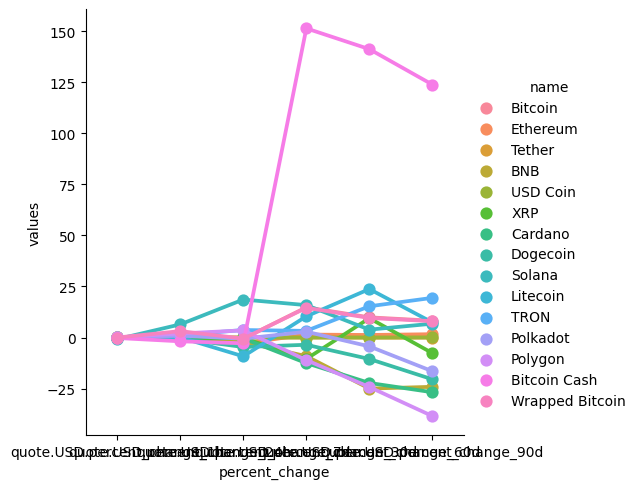

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

The x-axis labels are not clear, therefore, we will rename them in a shorter format and re-run the plot code

In [26]:
df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1h', '24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.063653
1,Bitcoin,24h,0.126997
2,Bitcoin,7d,-0.587887
3,Bitcoin,30d,14.796169
4,Bitcoin,60d,9.886537
...,...,...,...
85,Wrapped Bitcoin,24h,3.141782
86,Wrapped Bitcoin,7d,-0.539637
87,Wrapped Bitcoin,30d,14.570046
88,Wrapped Bitcoin,60d,9.563060


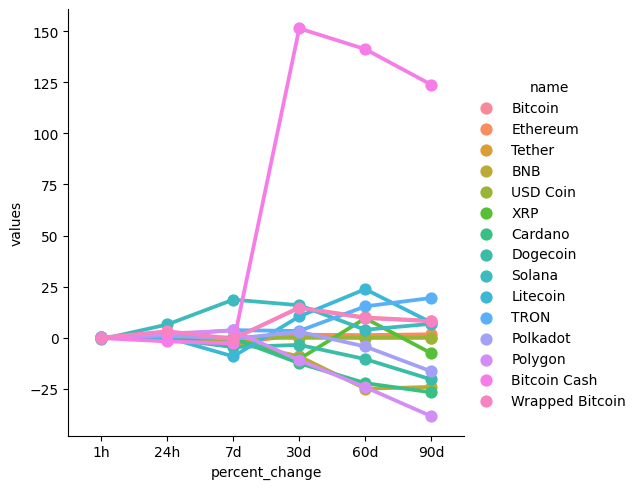

In [27]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

The plot/line chart looks neat!
As observed, all coins exhibit minimal change at the 1-hour interval whereas Bitcoin Cash (BCH) shows the best percent change and Polygon (MATIC) shows the worst percent change on the 90-day interval.

In [28]:
df8=df[['name','quote.USD.price','timestamp']]
df8

,name,quote.USD.price,timestamp
0,Bitcoin,30249.706651,2023-07-08 06:03:32.719786+00:00
1,Ethereum,1862.791933,2023-07-08 06:03:32.719786+00:00
2,Tether,1.000029,2023-07-08 06:03:32.719786+00:00
3,BNB,235.779542,2023-07-08 06:03:32.719786+00:00
4,USD Coin,0.999947,2023-07-08 06:03:32.719786+00:00
...,...,...,...
10,TRON,0.079049,2023-07-08 06:06:44.981804+00:00
11,Polkadot,5.151397,2023-07-08 06:06:44.981804+00:00
12,Polygon,0.678675,2023-07-08 06:06:44.981804+00:00
13,Bitcoin Cash,278.614878,2023-07-08 06:06:44.981804+00:00


In [30]:
df9=df8.query("name=='Bitcoin'") #this shows data only for Bitcoin (BTC)
df9

,name,quote.USD.price,timestamp
0,Bitcoin,30249.706651,2023-07-08 06:03:32.719786+00:00
0,Bitcoin,30249.706651,2023-07-08 06:03:44.289761+00:00
0,Bitcoin,30256.386626,2023-07-08 06:04:44.519440+00:00
0,Bitcoin,30257.812538,2023-07-08 06:05:44.747525+00:00
0,Bitcoin,30255.387848,2023-07-08 06:06:44.981804+00:00


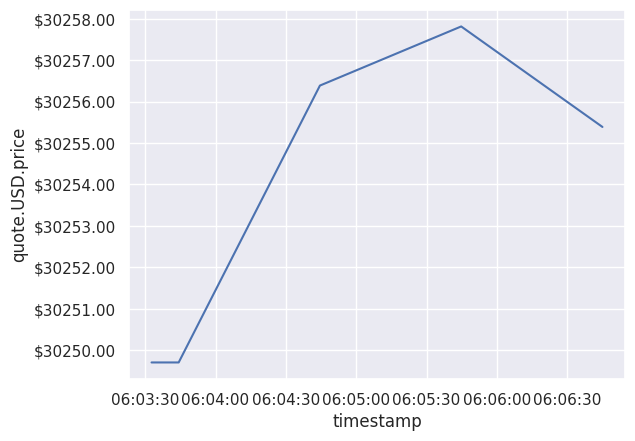

In [42]:
import matplotlib.ticker as ticker

sns.set_theme(style="darkgrid")
ax = sns.lineplot(x='timestamp', y='quote.USD.price', data=df9)

# Format y-axis ticks with actual price values
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('$%.2f'))

plt.show()

This plot/line chart shows price movements of Bitcoin (BTC) over time. For the sake of this case study, it shows its movement by 1-minute intervals but you can modify that to show its movements by 1-hour, 1-day, 1-week intervals!

#Additional: Export CoinMarketCap Data (Rank, Name & Symbol) into CSV

In [43]:
import csv

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)

    # Specify the file path and name for the CSV file
    csv_file = 'crypto_data.csv'

    # Extract the required fields from each element in the data list
    rows = []
    for item in data['data']:
        # Extract the desired fields from the item dictionary
        rank = item['cmc_rank']
        name = item['name']
        symbol = item['symbol']
        # Add a new row with the extracted fields
        rows.append([rank, name, symbol])

    # Write the data to the CSV file
    with open(csv_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Rank', 'Name', 'Symbol'])  # Write header row
        writer.writerows(rows)  # Write the data rows

    print(f"Data exported to {csv_file}")

except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

Data exported to crypto_data.csv


#Additional: Export the Entire CoinMarketCap Data into CSV

In [44]:
import csv

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)

    # Specify the file path and name for the CSV file
    csv_file = 'crypto_data_complete.csv'

    # Extract the keys from the first element to use as column headers
    headers = list(data['data'][0].keys())

    # Extract the values for each element in the data list
    rows = []
    for item in data['data']:
        row = [item[column] for column in headers]
        rows.append(row)

    # Write the data to the CSV file
    with open(csv_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(headers)  # Write column headers
        writer.writerows(rows)  # Write the data rows

    print(f"Data exported to {csv_file}")

except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

Data exported to crypto_data_complete.csv


#Conclusion

Automating the pull of cryptocurrency data through the API has the potential to revolutionize your data analytics workflow. The methodology outlined in this case study demonstrates the value of leveraging APIs to streamline data retrieval processes. We recommend further exploring the possibilities of integrating additional data sources and expanding the scope of analysis to maximize the potential benefits.

#References

*   CoinMarketCap API documentation: https://coinmarketcap.com/api/documentation/v1/
*   Python requests library documentation: https://requests.readthedocs.io
*   Python pandas library documentation: https://pandas.pydata.org/
*   JSON documentation: https://www.json.org/json-en.html







